In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
wine_data = pd.read_csv('../data/rawdata/wine-reviews/winemag-data-130k-v2.csv')

In [3]:
wine_data.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [4]:
wine_data.describe()

,Unnamed: 0,points,price
count,129971.000000,129971.000000,120975.000000
mean,64985.000000,88.447138,35.363389
std,37519.540256,3.039730,41.022218
min,0.000000,80.000000,4.000000
25%,32492.500000,86.000000,17.000000
50%,64985.000000,88.000000,25.000000
75%,97477.500000,91.000000,42.000000
max,129970.000000,100.000000,3300.000000


In [5]:
wine_data.count()

Unnamed: 0               129971
country                  129908
description              129971
designation               92506
points                   129971
price                    120975
province                 129908
region_1                 108724
region_2                  50511
taster_name              103727
taster_twitter_handle     98758
title                    129971
variety                  129970
winery                   129971
dtype: int64

In [6]:
wine_data.nunique()

Unnamed: 0               129971
country                      43
description              119955
designation               37979
points                       21
price                       390
province                    425
region_1                   1229
region_2                     17
taster_name                  19
taster_twitter_handle        15
title                    118840
variety                     707
winery                    16757
dtype: int64

In [7]:
wine_data['country'].unique()

array(['Italy', 'Portugal', 'US', 'Spain', 'France', 'Germany',
       'Argentina', 'Chile', 'Australia', 'Austria', 'South Africa',
       'New Zealand', 'Israel', 'Hungary', 'Greece', 'Romania', 'Mexico',
       'Canada', nan, 'Turkey', 'Czech Republic', 'Slovenia',
       'Luxembourg', 'Croatia', 'Georgia', 'Uruguay', 'England',
       'Lebanon', 'Serbia', 'Brazil', 'Moldova', 'Morocco', 'Peru',
       'India', 'Bulgaria', 'Cyprus', 'Armenia', 'Switzerland',
       'Bosnia and Herzegovina', 'Ukraine', 'Slovakia', 'Macedonia',
       'China', 'Egypt'], dtype=object)

In [8]:
country_province = wine_data.groupby(['taster_name']).mean()
country_province.reset_index
country_province = country_province.reset_index()
country_province.head()

,taster_name,Unnamed: 0,points,price
0,Alexander Peartree,63922.395181,85.855422,29.053269
1,Anna Lee C. Iijima,66204.838732,88.415629,29.790112
2,Anne Krebiehl MW,66607.729715,90.562551,31.230135
3,Carrie Dykes,76156.568345,86.395683,30.753623
4,Christina Pickard,55558.166667,87.833333,29.333333


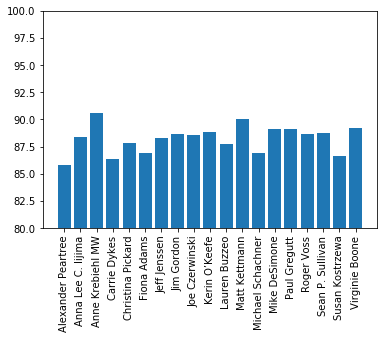

In [9]:
plt.bar(country_province['taster_name'],country_province['points'])
plt.ylim(80,100)
plt.xticks(rotation=90)

plt.show()

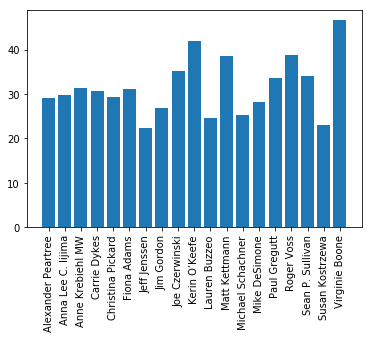

In [10]:
plt.bar(country_province['taster_name'],country_province['price'])
#plt.ylim(80,100)
plt.xticks(rotation=90)

plt.show()

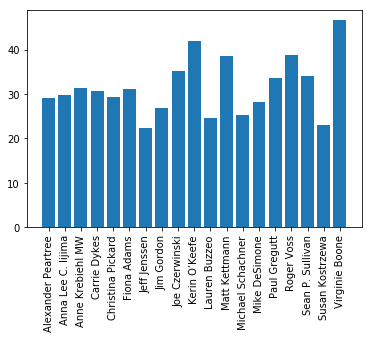

In [11]:
plt.bar(country_province['taster_name'],country_province['price'])
#plt.ylim(80,100)
plt.xticks(rotation=90)

plt.show()

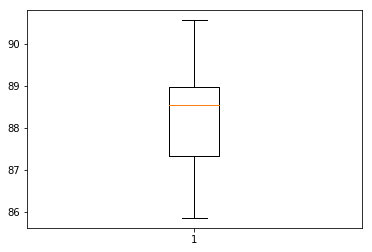

In [12]:
plt.boxplot(country_province['points'])
#plt.ylim(80,100)
#plt.xticks(rotation=90)

plt.show()

In [13]:
price = country_province.price
points = country_province.points
taster = country_province.taster_name

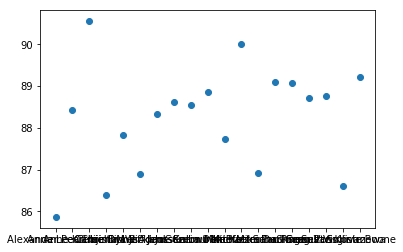

In [14]:
plt.scatter(taster,points)

<BarContainer object of 19 artists>

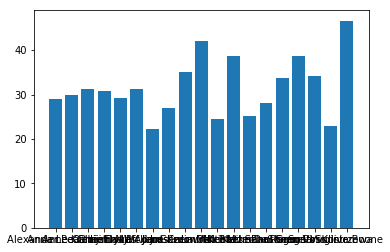

In [15]:
plt.bar(taster,price)

In [16]:
country_df = wine_data.groupby(['country']).mean()
country_df = country_df.reset_index()
country_df.head()

,country,Unnamed: 0,points,price
0,Argentina,65075.723158,86.710263,24.510117
1,Armenia,37158.000000,87.500000,14.500000
2,Australia,65037.539287,88.580507,35.437663
3,Austria,65614.296861,90.101345,30.762772
4,Bosnia and Herzegovina,56613.000000,86.500000,12.500000


In [17]:
country_price = country_df.price
country_points = country_df.points
country = country_df.country

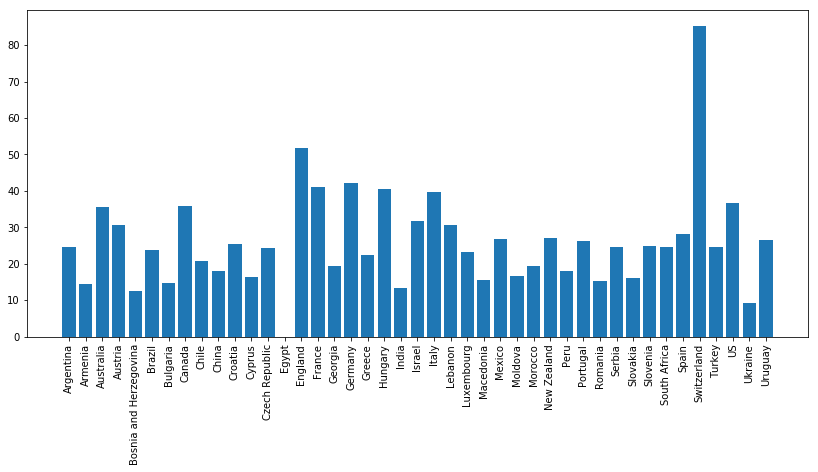

In [18]:
plt.figure(figsize=(14,6))
plt.bar(country,country_price)
plt.xticks(rotation=90)

plt.show()

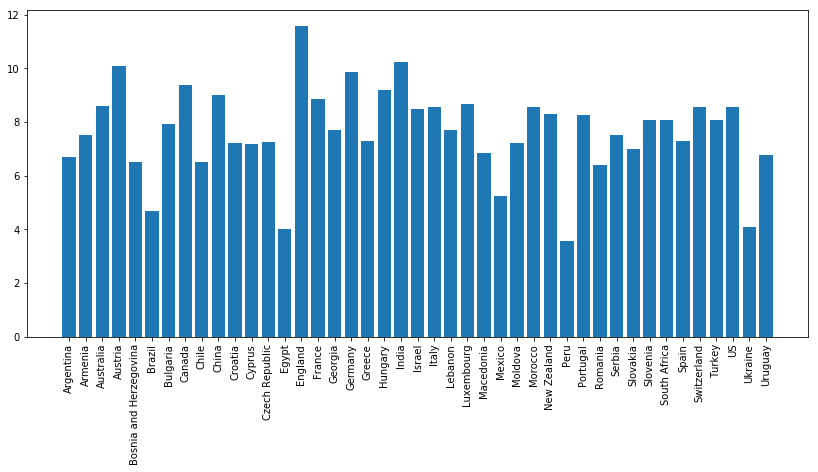

In [19]:
new_country_points = country_points - 80
plt.figure(figsize=(14,6))
plt.bar(country,new_country_points)
plt.xticks(rotation=90)

plt.show()

In [20]:
country_count = wine_data.groupby('country').count()
country_count = country_count.reset_index()
country_count = country_count.sort_values('Unnamed: 0')
country = country_count.country
#country_count = country_count.reset_index()
#country_province.head()
country_count.head()

,country,Unnamed: 0,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
9,China,1,1,1,1,1,1,0,0,1,1,1,1,1
34,Slovakia,1,1,0,1,1,1,0,0,1,0,1,1,1
13,Egypt,1,1,1,1,0,1,0,0,1,1,1,1,1
1,Armenia,2,2,2,2,2,2,0,0,2,2,2,2,2
4,Bosnia and Herzegovina,2,2,1,2,2,2,0,0,2,1,2,2,2


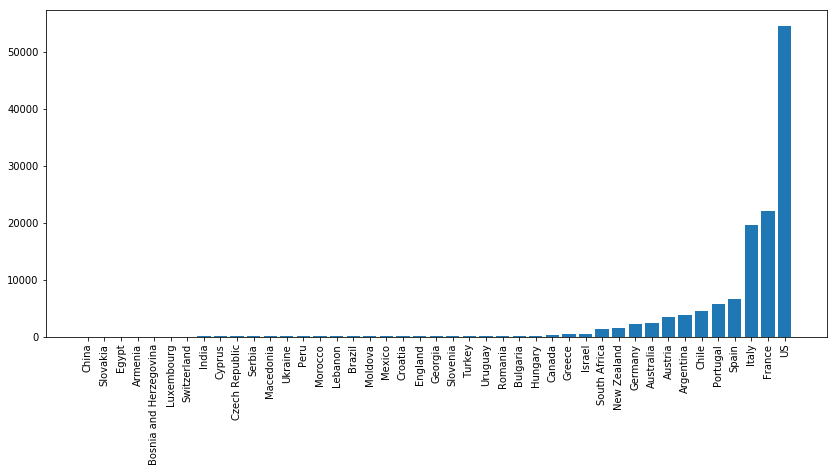

In [21]:
country = country_count.country
n_country = country_count['Unnamed: 0']
plt.figure(figsize=(14,6))
plt.bar(country,n_country)
plt.xticks(rotation=90)
#plt.yscale('log')
plt.show()

In [22]:
clean_data = wine_data.dropna(subset=['country', 'price', 'points'])
clean_data.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem


In [23]:
clean_data.taster_name.value_counts()

Roger Voss            20172
Michael Schachner     14944
Kerin O’Keefe          9874
Virginie Boone         9507
Paul Gregutt           9497
Matt Kettmann          6237
Joe Czerwinski         5010
Sean P. Sullivan       4925
Anna Lee C. Iijima     4369
Jim Gordon             4171
Anne Krebiehl MW       3389
Lauren Buzzeo          1712
Susan Kostrzewa        1068
Mike DeSimone           492
Jeff Jenssen            469
Alexander Peartree      413
Carrie Dykes            138
Fiona Adams              27
Christina Pickard         6
Name: taster_name, dtype: int64

In [24]:
clean_data.country.value_counts()

US                        54265
France                    17776
Italy                     16914
Spain                      6573
Portugal                   4875
Chile                      4416
Argentina                  3756
Austria                    2799
Australia                  2294
Germany                    2120
New Zealand                1378
South Africa               1293
Israel                      489
Greece                      461
Canada                      254
Hungary                     145
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Georgia                      84
Slovenia                     80
Croatia                      71
Mexico                       70
England                      69
Moldova                      59
Brazil                       47
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14
Serbia  

In [25]:
ccountry = clean_data.country
cprice = clean_data.price
cpoints = clean_data.points
cprovince = clean_data.province
clean_data.dtypes

Unnamed: 0                 int64
country                   object
description               object
designation               object
points                     int64
price                    float64
province                  object
region_1                  object
region_2                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
dtype: object

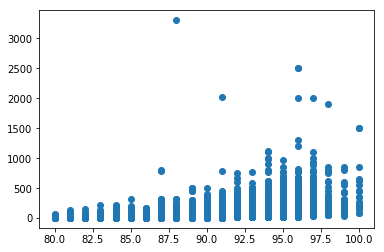

In [26]:
plt.scatter(cpoints,cprice)
plt.show()

In [27]:
median_price = clean_data.groupby('points').median()
median_price = median_price.reset_index()
median_price.head()

#avg_price = clean_data.groupby('points').mean()
#avg_price.head()


,points,Unnamed: 0,price
0,80,83845.0,14.0
1,81,78051.5,14.0
2,82,63802.5,15.0
3,83,69921.0,15.0
4,84,61038.0,15.0


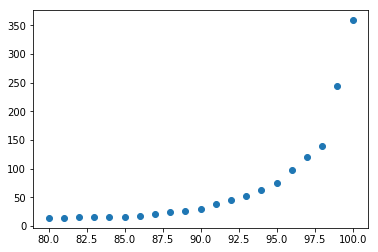

In [28]:
plt.scatter(median_price['points'],median_price['price'])
plt.show()

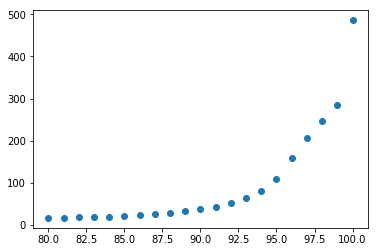

In [96]:
plt.scatter(median_price['points'],avg_price['price'])
plt.show()

In [29]:
avg_price = clean_data.groupby('points').mean()
avg_price = avg_price.reset_index()
avg_price.head()

,points,Unnamed: 0,price
0,80,74968.572152,16.372152
1,81,70810.191176,17.182353
2,82,67098.678330,18.870767
3,83,67893.402633,18.237353
4,84,63399.280630,19.314581


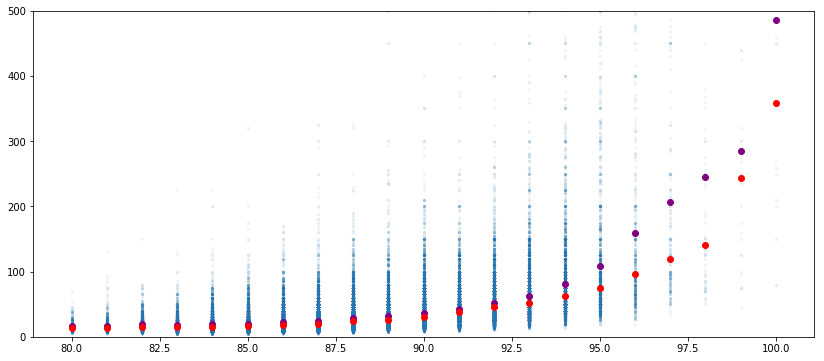

In [119]:
plt.figure(figsize=(14,6))
plt.scatter(cpoints,cprice,alpha=0.05,s=5)
plt.scatter(avg_price['points'],avg_price['price'],c='purple')
plt.scatter(median_price['points'],median_price['price'],c='r')
#plt.scatter(cpoints,cprice,alpha=0.1)
plt.ylim(0,500)
plt.show()

In [33]:
country_province[country_province['taster_name']=='Roger Voss']['points']

15    88.708003
Name: points, dtype: float64

In [34]:
clean_data.taster_name.value_counts()

Roger Voss            20172
Michael Schachner     14944
Kerin O’Keefe          9874
Virginie Boone         9507
Paul Gregutt           9497
Matt Kettmann          6237
Joe Czerwinski         5010
Sean P. Sullivan       4925
Anna Lee C. Iijima     4369
Jim Gordon             4171
Anne Krebiehl MW       3389
Lauren Buzzeo          1712
Susan Kostrzewa        1068
Mike DeSimone           492
Jeff Jenssen            469
Alexander Peartree      413
Carrie Dykes            138
Fiona Adams              27
Christina Pickard         6
Name: taster_name, dtype: int64

In [97]:
RV = clean_data.loc[clean_data['taster_name']=='Roger Voss',['points','price']]
MS = clean_data.loc[clean_data['taster_name']=='Michael Schachner',['points','price']]
KO = clean_data.loc[clean_data['taster_name']=='Kerin O’Keefe',['points','price']]
VB = clean_data.loc[clean_data['taster_name']=='Virginie Boone',['points','price']]
PG = clean_data.loc[clean_data['taster_name']=='Paul Gregutt',['points','price']]
MK = clean_data.loc[clean_data['taster_name']=='Matt Kettmann',['points','price']]
JC = clean_data.loc[clean_data['taster_name']=='Joe Czerwinski',['points','price']]
SP = clean_data.loc[clean_data['taster_name']=='Sean P. Sullivan',['points','price']]
AL = clean_data.loc[clean_data['taster_name']=='Anna Lee C. Iijima',['points','price']]
JG = clean_data.loc[clean_data['taster_name']=='Jim Gordon',['points','price']]

AK = clean_data.loc[clean_data['taster_twitter_handle']=='@AnneInVino',['points','price']]

LB = clean_data.loc[clean_data['taster_name']=='Lauren Buzzeo',['points','price']]
SK = clean_data.loc[clean_data['taster_name']=='Susan Kostrzewa',['points','price']]
MD = clean_data.loc[clean_data['taster_name']=='Mike DeSimone',['points','price']]
JJ = clean_data.loc[clean_data['taster_name']=='Jeff Jenssen',['points','price']]
AP = clean_data.loc[clean_data['taster_name']=='Alexander Peartree',['points','price']]
CD = clean_data.loc[clean_data['taster_name']=='Carrie Dykes',['points','price']]
FA = clean_data.loc[clean_data['taster_name']=='Fiona Adams',['points','price']]
CP = clean_data.loc[clean_data['taster_name']=='Christina Pickard',['points','price']]

In [66]:
#MS.points.head()

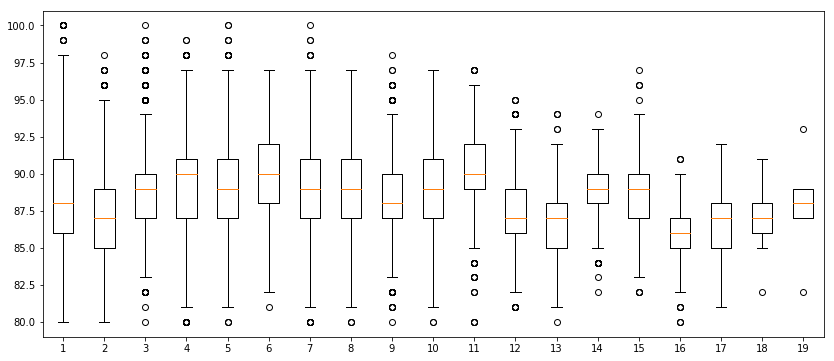

In [117]:
plt.figure(figsize=(14,6))
plt.boxplot([RV.points,MS.points,KO.points,VB.points,PG.points,MK.points,JC.points,SP.points,AL.points,
            JG.points,AK.points,LB.points,SK.points,MD.points,JJ.points,AP.points,CD.points,FA.points,CP.points])


plt.show()

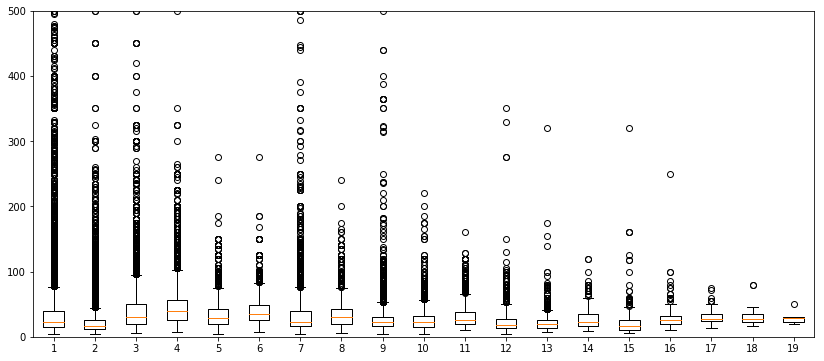

In [99]:
plt.figure(figsize=(14,6))
plt.boxplot([RV.price,MS.price,KO.price,VB.price,PG.price,MK.price,JC.price,SP.price,AL.price,
            JG.price,AK.price,LB.price,SK.price,MD.price,JJ.price,AP.price,CD.price,FA.price,CP.price],showfliers=True)
plt.ylim(0,500)
plt.show()

In [ ]:
US                        54265
France                    17776
Italy                     16914
Spain                      6573
Portugal                   4875
Chile                      4416
Argentina                  3756
Austria                    2799
Australia                  2294
Germany                    2120
New Zealand                1378
South Africa               1293
Israel                      489
Greece                      461
Canada                      254
Hungary                     145
Bulgaria                    141
Romania                     120
Uruguay                     109

In [88]:
us = clean_data.loc[clean_data['country']=='US',['points','price']]
france = clean_data.loc[clean_data['country']=='France',['points','price']]
italy = clean_data.loc[clean_data['country']=='Italy',['points','price']]
spain = clean_data.loc[clean_data['country']=='Spain',['points','price']]
portugal = clean_data.loc[clean_data['country']=='Portugal',['points','price']]
argentina = clean_data.loc[clean_data['country']=='Argentina',['points','price']]
austria = clean_data.loc[clean_data['country']=='Austria',['points','price']]
australia = clean_data.loc[clean_data['country']=='Australia',['points','price']]
germany = clean_data.loc[clean_data['country']=='Germany',['points','price']]
newzealand = clean_data.loc[clean_data['country']=='New Zealand',['points','price']]
southafrica = clean_data.loc[clean_data['country']=='South Africa',['points','price']]
israel = clean_data.loc[clean_data['country']=='Israel',['points','price']]
greece = clean_data.loc[clean_data['country']=='Greece',['points','price']]
canada = clean_data.loc[clean_data['country']=='Canada',['points','price']]

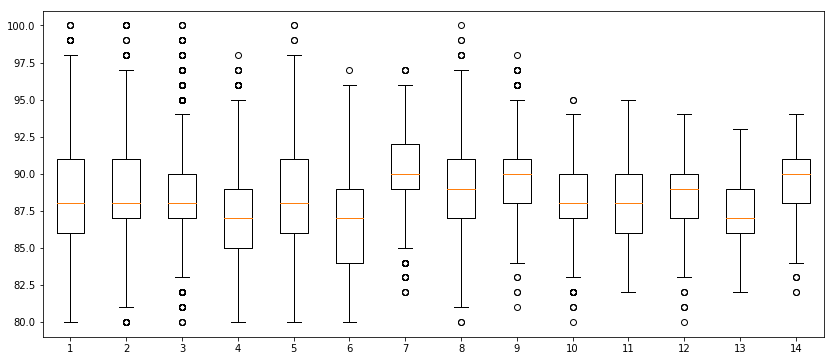

In [91]:
plt.figure(figsize=(14,6))
plt.boxplot([us.points,france.points,italy.points,spain.points,portugal.points,argentina.points,austria.points,australia.points,
             germany.points,newzealand.points,southafrica.points,israel.points,greece.points,canada.points])
plt.show()

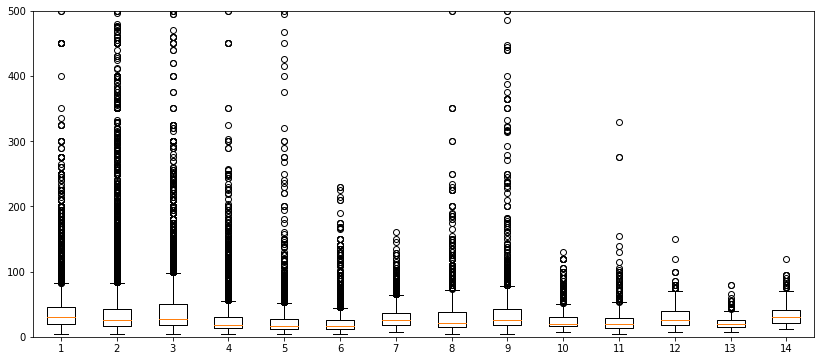

In [101]:
plt.figure(figsize=(14,6))
plt.boxplot([us.price,france.price,italy.price,spain.price,portugal.price,argentina.price,austria.price,australia.price,
             germany.price,newzealand.price,southafrica.price,israel.price,greece.price,canada.price],showfliers=True)
plt.ylim(0,500)
plt.show()

In [102]:
clean_data.taster_name.value_counts()

Roger Voss            20172
Michael Schachner     14944
Kerin O’Keefe          9874
Virginie Boone         9507
Paul Gregutt           9497
Matt Kettmann          6237
Joe Czerwinski         5010
Sean P. Sullivan       4925
Anna Lee C. Iijima     4369
Jim Gordon             4171
Anne Krebiehl MW       3389
Lauren Buzzeo          1712
Susan Kostrzewa        1068
Mike DeSimone           492
Jeff Jenssen            469
Alexander Peartree      413
Carrie Dykes            138
Fiona Adams              27
Christina Pickard         6
Name: taster_name, dtype: int64

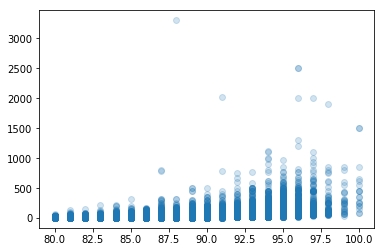

In [103]:
plt.scatter(cpoints,cprice,alpha=0.2)
plt.show()

In [ ]:
len(cpoints)

In [104]:
pts_counts = clean_data.groupby('points')['Unnamed: 0'].count()
pts_counts

points
80       395
81       680
82      1772
83      2886
84      6097
85      8901
86     11740
87     15761
88     16005
89     11306
90     14354
91     10559
92      8865
93      5935
94      3449
95      1406
96       482
97       207
98        69
99        28
100       19
Name: Unnamed: 0, dtype: int64

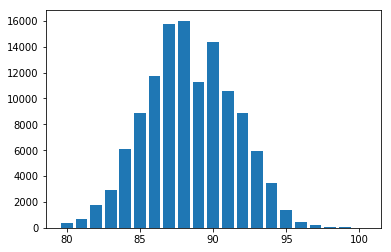

In [105]:
plt.bar(median_price['points'],pts_counts)
plt.show()

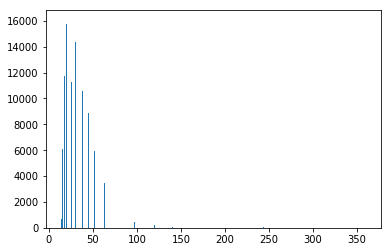

In [106]:
plt.bar(median_price['price'],pts_counts)
plt.show()

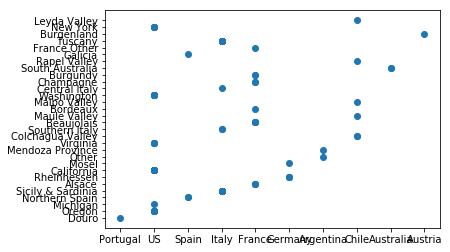

In [109]:
plt.scatter(ccountry[:100],cprovince[:100])

In [108]:
ccountry[:10]
#plt.scatter(ccountry[:10],cprovince[:10])

1     Portugal
2           US
3           US
4           US
5        Spain
6        Italy
7       France
8      Germany
9       France
10          US
Name: country, dtype: object

In [ ]:
wine_type = clean_data.groupby('variety').count()
wine_type.reset_index()
wine_type = wine_type.sort_values('Unnamed: 0',ascending=False)
wine_type.head(100)
